<h1>Segmentation Example</h1>

In [1]:
# Load segmenting functions
include("C:\\Users\\cmeri\\OneDrive - Dartmouth College\\Math_76\\FinalProject\\Math76_FinalProject\\Julia_Segment.jl")

segment_mask (generic function with 1 method)

<h3>Raster Conversion and Image Creation</h3>

This section demonstates how to create .jpg images from the raw .tiff raster files. Images can be created by combining any three bands from the raster or by creating a normalized difference index using two bands. For these rasters, the Red, Blue, Green, Near-Infrared, and Shortwave Infrared are included. Below we create a vizuale image using the Red, Green, and Blue bands.

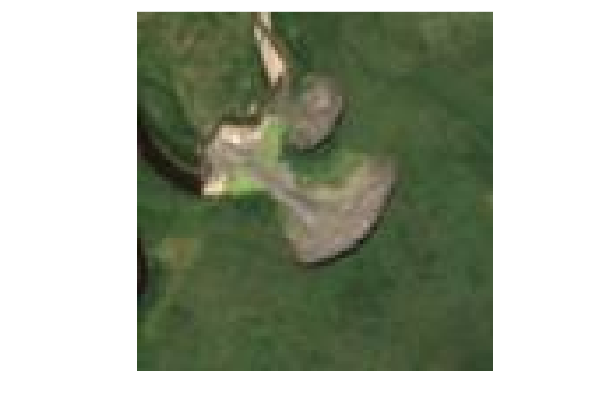

In [2]:
# Select .tif file to display
selected_date = "C:\\Users\\cmeri\\OneDrive - Dartmouth College\\Math_76\\FinalProject\\Math76_FinalProject\\Data\\Sentinel-s002\\Sentinel2_2021-07-23.tif"

# Select Red, Green, and Blue bands from the raster and save as a .jpg image
path = select_bands(selected_date, 1, 2, 3, "RGB.jpg") # 1-Red, 2-Green, 3-Blue image bands

# Load the newly create .jpg image
RGB_image = load(path)

# Plot the image
plot(RGB_image, framestyle=:none)

<h3>Basic Segmenting</h3>
The `count_pixels` function uses seeded segmentation to segment an individual image. Plotting the result for the image above shows that the RGB image is fairly nicely segmented using this algorithm. Later, we use masks to apply the segmentation to many images.

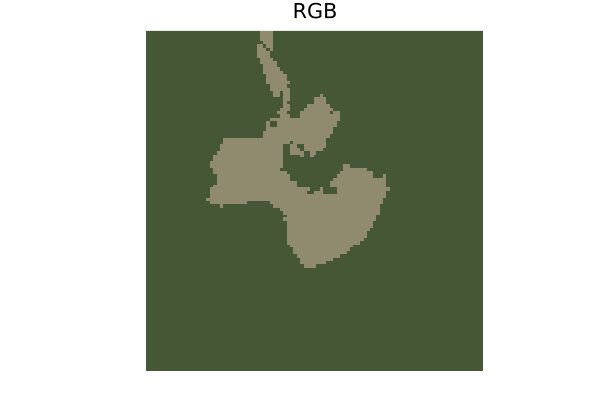

The segemented region contains 1371 pixels.


1371

In [3]:
# Segement the RGB image
count_pixels(path, (58,51), (90,90), Display=true) # Uses two seeds

<h3>Segmenting Time Series</h3>
We can now segment many images for a given hillslope failure over time. The `segment_mask` function first creates a water mask to limit the number of water pixels classified as part of the failure. It then segments each sucessive image, starting with the most recent image. Since the failure should not be larger at earlier times, the function uses a vegetation mask if a poor segmentation results in a larger failure at earlier times. If this happens, the previous image is thresholded to get pixels with low vegetation cover. Then, in the current image, only pixels that also have low vegetation cover within that mask are selected. This ensures that the slump can growth only in the forwards time direction.

The segemented region contains 2017 pixels.
The segemented region contains 1474 pixels.
The segemented region contains 1570 pixels.
The segemented region contains 1588 pixels.
The segemented region contains 1594 pixels.
The segemented region contains 1735 pixels.
The segemented region contains 1394 pixels.
The segemented region contains 1328 pixels.
The segemented region contains 1618 pixels.
The segemented region contains 1455 pixels.
The segemented region contains 1431 pixels.
The segemented region contains 998 pixels.
The segemented region contains 1110 pixels.
The segemented region contains 1142 pixels.
The segemented region contains 1020 pixels.
The segemented region contains 1320 pixels.
The segemented region contains 1361 pixels.
The segemented region contains 1354 pixels.
The segemented region contains 1325 pixels.
The segemented region contains 1272 pixels.
The segemented region contains 1107 pixels.
The segemented region contains 797 pixels.
The segemented region contains 104

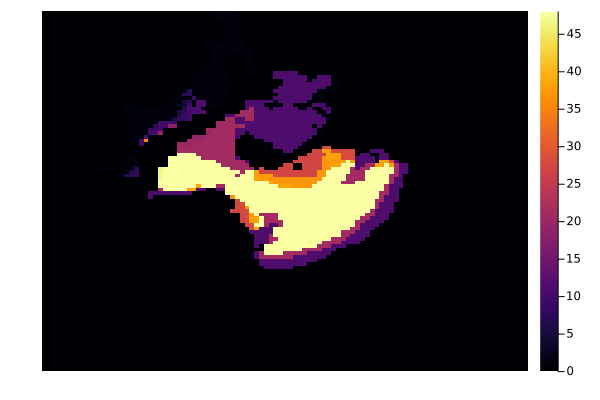

48×2 DataFrame
 Row │ Date        Pixels 
     │ Date        Int64  
─────┼────────────────────
   1 │ 2019-06-07     743
   2 │ 2019-06-10     746
   3 │ 2019-06-17     747
   4 │ 2019-07-25     747
   5 │ 2019-07-27     747
   6 │ 2019-09-03     747
   7 │ 2019-09-07     747
   8 │ 2019-09-20     747
   9 │ 2019-09-28     747
  10 │ 2020-06-03     746
  11 │ 2020-06-14     746
  ⋮  │     ⋮         ⋮
  39 │ 2023-07-04    1276
  40 │ 2023-07-29    1276
  41 │ 2023-08-08    1262
  42 │ 2023-09-17    1254
  43 │ 2024-06-05    1251
  44 │ 2024-06-10    1264
  45 │ 2024-06-15    1267
  46 │ 2024-06-23    1274
  47 │ 2024-07-23    1474
  48 │ 2024-08-06    2017
           27 rows omitted

In [4]:
data_path = "C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s002"
result = segment_mask(data_path,(58,51),(90,90),Seed3=(5,5),Display=true,ndvi_threshold=0.5,ndwi_threshold=0.7,ndwi_image="Sentinel2_2019-06-07.tif")

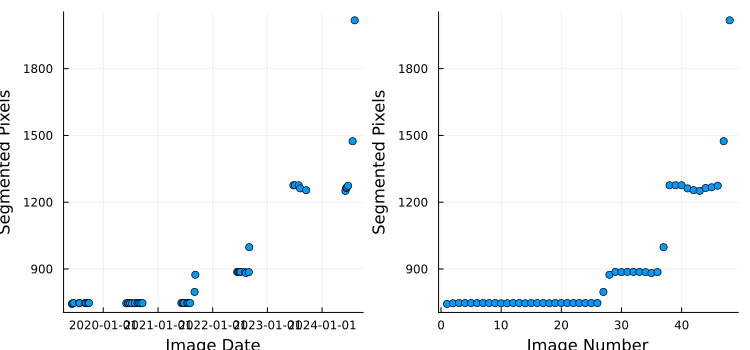

In [5]:
layout = @layout [a b]
p1 = plot(result.Date, result.Pixels, xlabel="Image Date", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter)
p2 = plot(result.Pixels, xlabel="Image Number", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter)
plot(p1, p2, layout=layout, size=(750, 350))

In [6]:
preview("C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s003/RGB/RGB_2023-07-04.jpg")

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(Ptr{GObject} @0x00…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), RGB…

The segemented region contains 406 pixels.
The segemented region contains 307 pixels.
The segemented region contains 379 pixels.
The segemented region contains 434 pixels.
The segemented region contains 401 pixels.
The segemented region contains 359 pixels.
The segemented region contains 1053 pixels.
The segemented region contains 332 pixels.
The segemented region contains 252 pixels.
The segemented region contains 247 pixels.
The segemented region contains 255 pixels.
The segemented region contains 264 pixels.
The segemented region contains 1575 pixels.
The segemented region contains 348 pixels.
The segemented region contains 327 pixels.
The segemented region contains 179 pixels.
The segemented region contains 214 pixels.
The segemented region contains 377 pixels.
The segemented region contains 326 pixels.
The segemented region contains 3057 pixels.
The segemented region contains 341 pixels.
The segemented region contains 343 pixels.
The segemented region contains 210 pixels.
The sege

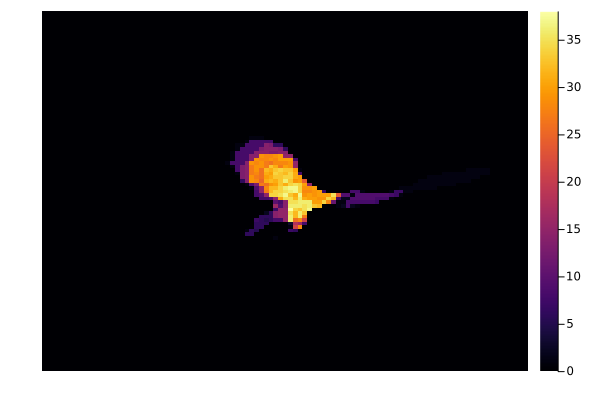

38×2 DataFrame
 Row │ Date        Pixels 
     │ Date        Int64  
─────┼────────────────────
   1 │ 2019-06-18      48
   2 │ 2019-06-23      82
   3 │ 2019-07-17      85
   4 │ 2019-07-28      91
   5 │ 2019-09-10      86
   6 │ 2020-06-12      49
   7 │ 2020-06-17      34
   8 │ 2020-06-22      95
   9 │ 2020-07-14     167
  10 │ 2020-07-26     160
  11 │ 2020-07-31     172
  ⋮  │     ⋮         ⋮
  29 │ 2023-06-11     247
  30 │ 2023-07-04     252
  31 │ 2023-07-17     298
  32 │ 2023-07-21     299
  33 │ 2023-08-01     295
  34 │ 2023-08-06     290
  35 │ 2023-09-09     284
  36 │ 2024-06-21     299
  37 │ 2024-07-11     307
  38 │ 2024-08-07     406
           17 rows omitted

In [7]:
data_path = "C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s003"
result = segment_mask(data_path,(48,50),(90,90),Seed3=(5,5),Display=true,ndvi_threshold=0.5,ndwi_threshold=0.65,ndwi_image="Sentinel2_2019-07-17.tif")

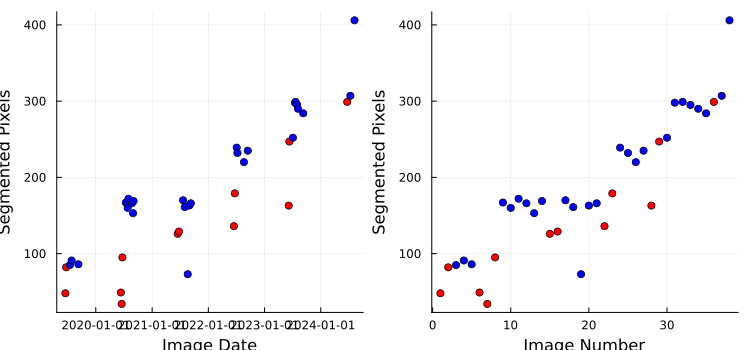

In [8]:
# Dates in June tend to be snow covered
june_test = month.(result.Date) .== 6

colors = Vector{Symbol}(undef, length(result.Date)) 
colors[june_test] .= :red  # Assign red to the points in June
colors[.!june_test] .= :blue  # Assign blue to other points

layout = @layout [a b]
p1 = plot(result.Date, result.Pixels, xlabel="Image Date", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter, color=colors)
p2 = plot(result.Pixels, xlabel="Image Number", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter, color=colors)
plot(p1, p2, layout=layout, size=(750, 350))

Much of the noise in the segmentation results can be attributed to dates early or late in the season when snow cover makes the slumps appear smaller than during the warmer parts of the year.